# Capston Minor Project

# Importing necessary libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

# 1. Download and read the data from the two CSV files

In [9]:
female_df = pd.read_csv('nhanes_adult_female_bmx_2020.csv')  # If semicolon is the delimiter
male_df = pd.read_csv('nhanes_adult_male_bmx_2020.csv')  # If semicolon is the delimiter

In [11]:
female_df

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2
...,...,...,...,...,...,...,...
4216,66.8,157.0,32.6,38.4,30.7,103.8,92.5
4217,116.9,167.4,42.2,43.0,40.7,128.4,120.0
4218,73.0,159.6,36.2,37.0,31.4,104.6,99.3
4219,78.6,168.5,38.1,40.2,36.0,102.4,98.5


In [13]:
male_df

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,98.8,182.3,42.0,40.1,38.2,108.2,120.4
1,74.3,184.2,41.1,41.0,30.2,94.5,86.8
2,103.7,185.3,47.0,44.0,32.0,107.8,109.6
3,86.0,167.8,39.5,38.4,29.0,106.4,108.3
4,99.4,181.6,40.4,39.9,36.0,120.2,107.0
...,...,...,...,...,...,...,...
4076,114.3,174.5,42.0,35.5,37.0,117.4,119.5
4077,94.3,178.8,37.8,44.6,35.7,105.3,99.3
4078,108.8,168.7,38.6,45.6,33.6,118.0,114.7
4079,79.5,176.4,39.5,42.0,31.4,99.8,97.1


The data is loaded from the provided CSV files using pandas and then converted into numpy arrays.

# 2. Convert the data to numpy matrices

In [21]:
male = male_df.to_numpy()
female = female_df.to_numpy()

In [29]:
male

array([[ 98.8, 182.3,  42. , ...,  38.2, 108.2, 120.4],
       [ 74.3, 184.2,  41.1, ...,  30.2,  94.5,  86.8],
       [103.7, 185.3,  47. , ...,  32. , 107.8, 109.6],
       ...,
       [108.8, 168.7,  38.6, ...,  33.6, 118. , 114.7],
       [ 79.5, 176.4,  39.5, ...,  31.4,  99.8,  97.1],
       [ 59.7, 167.5,  40.3, ...,  29.2,  90.5,  86.9]])

In [31]:
female

array([[ 97.1, 160.2,  34.7, ...,  35.8, 126.1, 117.9],
       [ 91.1, 152.7,  33.5, ...,  38.5, 125.5, 103.1],
       [ 73. , 161.2,  37.4, ...,  31.8, 106.2,  92. ],
       ...,
       [ 73. , 159.6,  36.2, ...,  31.4, 104.6,  99.3],
       [ 78.6, 168.5,  38.1, ...,  36. , 102.4,  98.5],
       [ 82.8, 147.8,  34.8, ...,  39.5, 121.4, 110. ]])

# 3. Plot histograms for male and female weights

In [26]:
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

# Top subplot: Female weights

Text(0, 0.5, 'Frequency')

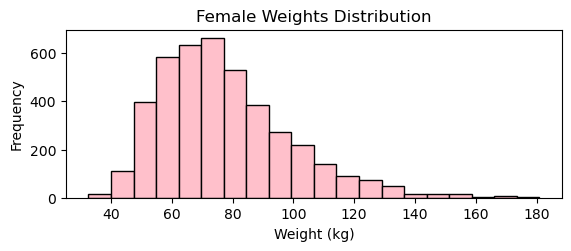

In [33]:
plt.subplot(2, 1, 1)
plt.hist(female[:, 0], bins=20, color='pink', edgecolor='black')
plt.title('Female Weights Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Bottom subplot: Male weights

Text(0, 0.5, 'Frequency')

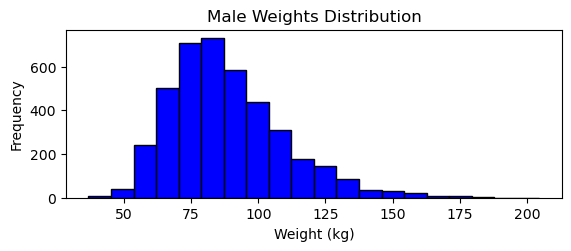

In [36]:
plt.subplot(2, 1, 2)
plt.hist(male[:, 0], bins=20, color='blue', edgecolor='black')
plt.title('Male Weights Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Setting x-axis limits to be the same for both plots

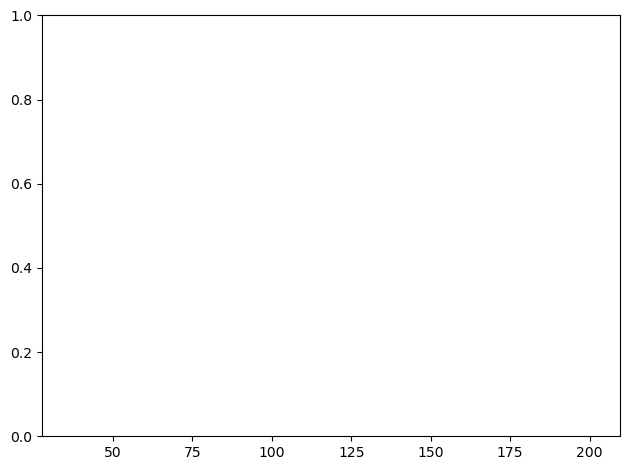

In [39]:
plt.xlim([min(min(female[:, 0]), min(male[:, 0])) - 5, 
          max(max(female[:, 0]), max(male[:, 0])) + 5])

plt.tight_layout()
plt.show()

# 4. Box-and-whisker plot for male and female weights

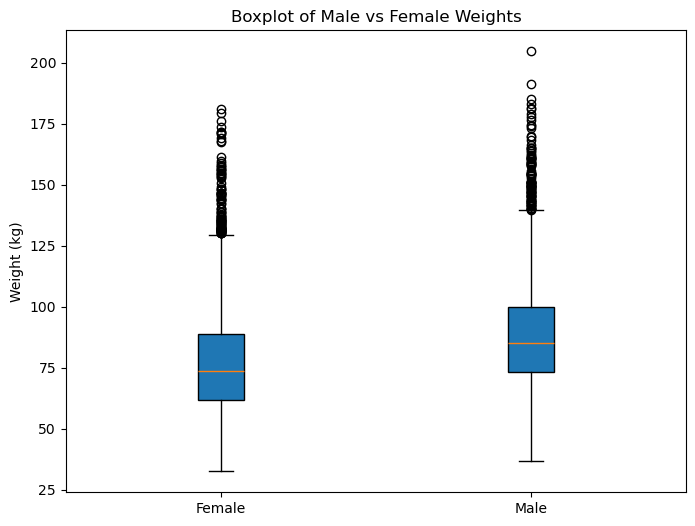

In [42]:
plt.figure(figsize=(8, 6))
plt.boxplot([female[:, 0], male[:, 0]], labels=['Female', 'Male'], patch_artist=True)
plt.title('Boxplot of Male vs Female Weights')
plt.ylabel('Weight (kg)')
plt.show()

# 5. Compute basic numerical aggregates for male and female weights

In [47]:
def calculate_aggregates(data):
    mean = np.mean(data)
    median = np.median(data)
    std_dev = np.std(data)
    min_val = np.min(data)
    max_val = np.max(data)
    skewness = pd.Series(data).skew()
    
    return {
        "mean": mean,
        "median": median,
        "std_dev": std_dev,
        "min": min_val,
        "max": max_val,
        "skewness": skewness
    }

# Calculate aggregates for male and female weights

In [50]:
female_weights_aggregates = calculate_aggregates(female[:, 0])
male_weights_aggregates = calculate_aggregates(male[:, 0])

# Display the aggregates

In [53]:
print("Female Weights Aggregates:")
print(female_weights_aggregates)
print("\nMale Weights Aggregates:")
print(male_weights_aggregates)

Female Weights Aggregates:
{'mean': 77.40379057095475, 'median': 73.6, 'std_dev': 21.54250829019315, 'min': 32.6, 'max': 180.9, 'skewness': 1.033728460112216}

Male Weights Aggregates:
{'mean': 88.36454300416565, 'median': 85.0, 'std_dev': 21.418936717962495, 'min': 36.8, 'max': 204.6, 'skewness': 0.9846430235310972}


# 6. To the female matrix, add the eighth column which gives the body mass indices of all the female participants

Formula for BMI: BMI = weight(kg) / (height(m)^2)

 Convert height from cm to meters and calculate BMI

In [61]:
female_bmi = female[:, 0] / (female[:, 1] / 100) ** 2

Add the BMI as the 8th column to the female matrix

In [65]:
female = np.column_stack((female, female_bmi))

# Display the updated female matrix

In [68]:
print("\nUpdated Female Matrix with BMI:")
print(female)


Updated Female Matrix with BMI:
[[ 97.1        160.2         34.7        ... 126.1        117.9
   37.83504078]
 [ 91.1        152.7         33.5        ... 125.5        103.1
   39.06972037]
 [ 73.         161.2         37.4        ... 106.2         92.
   28.09265496]
 ...
 [ 73.         159.6         36.2        ... 104.6         99.3
   28.65873958]
 [ 78.6        168.5         38.1        ... 102.4         98.5
   27.68361084]
 [ 82.8        147.8         34.8        ... 121.4        110.
   37.90368801]]


# 7. Standardize the female dataset by computing Z-scores for each column

In [71]:
zfemale = (female - np.mean(female, axis=0)) / np.std(female, axis=0)

Display the standardized female matrix

In [76]:
print("Standardized female matrix (zfemale):")
print(zfemale)

Standardized female matrix (zfemale):
[[ 9.14295084e-01  8.95037880e-03 -5.67394633e-01 ...  1.08316157e+00
   1.11578462e+00  9.96967703e-01]
 [ 6.35775985e-01 -1.05306843e+00 -1.07893145e+00 ...  1.04475528e+00
   2.65088995e-01  1.15617483e+00]
 [-2.04423297e-01  1.50552886e-01  5.83563204e-01 ... -1.90646881e-01
  -3.72932724e-01 -2.59275010e-01]
 ...
 [-2.04423297e-01 -7.60111255e-02  7.20263874e-02 ... -2.93063641e-01
   4.66671455e-02 -1.86280603e-01]
 [ 5.55278621e-02  1.18425119e+00  8.81959680e-01 ... -4.33886685e-01
   6.83598104e-04 -3.12019657e-01]
 [ 2.50491231e-01 -1.74692071e+00 -5.24766565e-01 ...  7.82312335e-01
   6.61697091e-01  1.00581950e+00]]


Selecting the standardised columns: [weight, height, waist, hip, BMI]

In [81]:
data = zfemale[:, [0, 1, 6, 5, 7]]  # Selecting relevant columns (indices)

Creating a DataFrame for pairplot

In [84]:
columns = ['Weight', 'Height', 'Waist Circumference', 'Hip Circumference', 'BMI']
df = pd.DataFrame(data, columns=columns)

# 8. Draw a scatterplot matrix (pairplot)

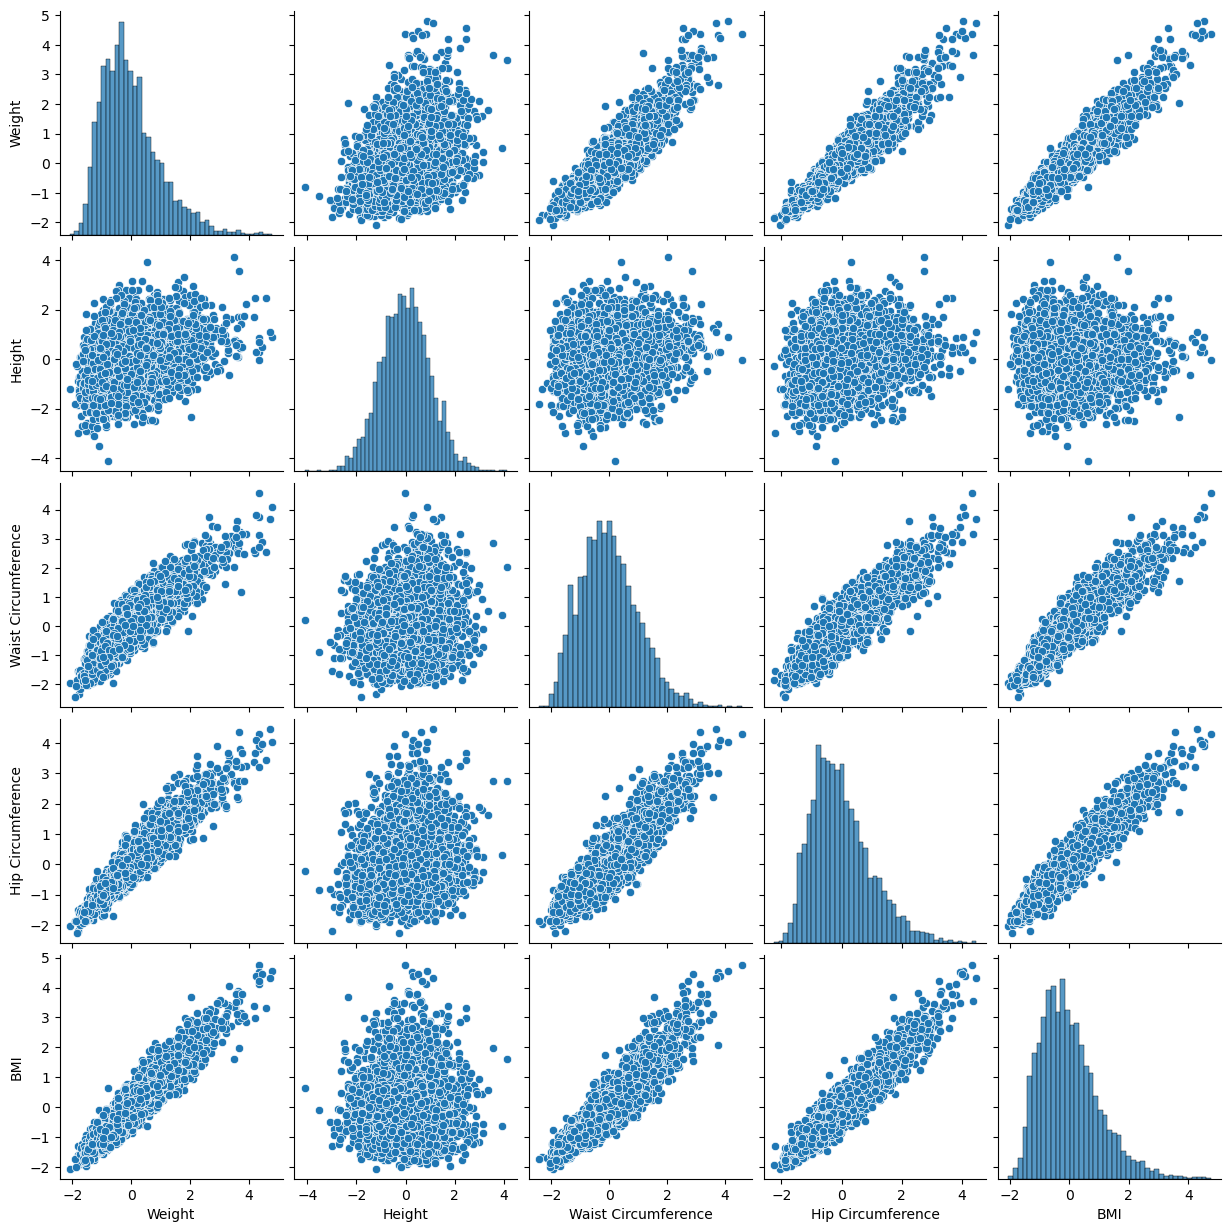

In [87]:
sns.pairplot(df)
plt.show()

# Compute Pearson's and Spearman's correlation coefficients

In [92]:
pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')

print("Pearson's Correlation Coefficients:")
print(pearson_corr)
print("\nSpearman's Correlation Coefficients:")
print(spearman_corr)

Pearson's Correlation Coefficients:
                       Weight    Height  Waist Circumference  \
Weight               1.000000  0.345496             0.904550   
Height               0.345496  1.000000             0.126547   
Waist Circumference  0.904550  0.126547             1.000000   
Hip Circumference    0.946553  0.202895             0.897407   
BMI                  0.945900  0.033077             0.921198   

                     Hip Circumference       BMI  
Weight                        0.946553  0.945900  
Height                        0.202895  0.033077  
Waist Circumference           0.897407  0.921198  
Hip Circumference             1.000000  0.944199  
BMI                           0.944199  1.000000  

Spearman's Correlation Coefficients:
                       Weight    Height  Waist Circumference  \
Weight               1.000000  0.338860             0.900169   
Height               0.338860  1.000000             0.108587   
Waist Circumference  0.900169  0.108587    

# 9. Compute waist-to-height and waist-to-hip ratios

Waist-to-height ratio = waist circumference / height

Waist-to-hip ratio = waist circumference / hip circumference

# Adding two more columns to male and female matrices

In [98]:
waist_to_height_female = female[:, 6] / female[:, 1]  # Waist/Height for females
waist_to_hip_female = female[:, 6] / female[:, 5]     # Waist/Hip for females

waist_to_height_male = male[:, 6] / male[:, 1]        # Waist/Height for males
waist_to_hip_male = male[:, 6] / male[:, 5]           # Waist/Hip for males

# Adding these columns to the respective matrices

In [104]:
female = np.column_stack((female, waist_to_height_female, waist_to_hip_female))
male = np.column_stack((male, waist_to_height_male, waist_to_hip_male))

# Display updated matrices

In [107]:
print("Updated female matrix with Waist-to-Height and Waist-to-Hip ratios:")
print(female)

print("Updated male matrix with Waist-to-Height and Waist-to-Hip ratios:")
print(male)

Updated female matrix with Waist-to-Height and Waist-to-Hip ratios:
[[ 97.1        160.2         34.7        ...  37.83504078   0.73595506
    0.93497224]
 [ 91.1        152.7         33.5        ...  39.06972037   0.67518009
    0.82151394]
 [ 73.         161.2         37.4        ...  28.09265496   0.5707196
    0.86629002]
 ...
 [ 73.         159.6         36.2        ...  28.65873958   0.62218045
    0.94933078]
 [ 78.6        168.5         38.1        ...  27.68361084   0.58456973
    0.96191406]
 [ 82.8        147.8         34.8        ...  37.90368801   0.74424899
    0.90609555]]
Updated male matrix with Waist-to-Height and Waist-to-Hip ratios:
[[ 98.8        182.3         42.         ... 120.4          0.66044981
    1.11275416]
 [ 74.3        184.2         41.1        ...  86.8          0.47122693
    0.91851852]
 [103.7        185.3         47.         ... 109.6          0.59147329
    1.01669759]
 ...
 [108.8        168.7         38.6        ... 114.7          0.67990516
  

# 10. Boxplot comparison for Waist-to-Height and Waist-to-Hip ratios

Next, we create a box-and-whisker plot for the waist-to-height and waist-to-hip ratios of both male and female participants.

# Prepare data for the boxplot

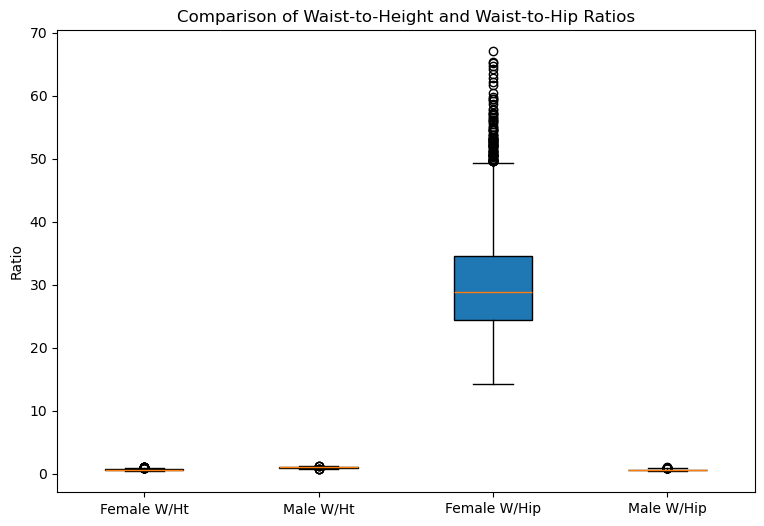

In [116]:
data = [female[:, 8], male[:, 8], female[:, 7], male[:, 7]]  # Waist-to-Height, Waist-to-Hip

plt.figure(figsize=(9, 6))
plt.boxplot(data, labels=['Female W/Ht', 'Male W/Ht', 'Female W/Hip', 'Male W/Hip'], patch_artist=True)
plt.title('Comparison of Waist-to-Height and Waist-to-Hip Ratios')
plt.ylabel('Ratio')
plt.show()

# 11. Advantages and Disadvantages of BMI, Waist-to-Height Ratio, and Waist-to-Hip Ratio

# Body Mass Index (BMI):

Advantages : Simple and widely used.Provides a quick assessment of whether an individual is underweight, normal, overweight, or obese.

Disadvantages : Does not distinguish between fat and muscle mass.Can misclassify individuals with high muscle mass as obese.

# Waist-to-Height Ratio:

Advantages : Better indicator of abdominal fat distribution and related health risks.Easier to calculate than BMI.

Disadvantages : Less commonly used than BMI.May not apply universally across all populations.

# Waist-to-Hip Ratio:

Advantages : Indicates the distribution of fat in the body (pear-shaped vs apple-shaped bodies).Better predictor of cardiovascular disease than BMI.

Disadvantages : Requires measurement of both waist and hip, which can be inconvenient.Interpretation of the ratio may vary based on gender and population.

# 12. Standardized body measurements for 5 persons with the lowest and highest BMI

Get indices for the 5 persons with lowest and highest BMI

In [133]:
sorted_bmi_indices = np.argsort(female[:, 7])  # Sorting based on the BMI column

# Select the 5 lowest and 5 highest

In [136]:
lowest_bmi_indices = sorted_bmi_indices[:5]
highest_bmi_indices = sorted_bmi_indices[-5:]

# Print standardized body measurements for these persons

In [139]:
print("5 Persons with Lowest BMI (Standardized):")
print(zfemale[lowest_bmi_indices])

print("\n5 Persons with Highest BMI (Standardized):")
print(zfemale[highest_bmi_indices])

5 Persons with Lowest BMI (Standardized):
[[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]]

5 Persons with Highest BMI (Standardized):
[[ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  4.54270932]
 [ 4.36